In [1]:
import sys
import os
sys.path.append('../../')

%load_ext autoreload
%autoreload 2
%matplotlib inline

os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [2]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from skimage.io import imread

from gen.load_data import load_data

In [3]:
from sklearn.utils import shuffle

train_df, valid_df, test_df = load_data('../../data')


print(train_df.head())


                                               image                   id  \
0  ../../data/Train/CameraRGB/episode_0002_000287...  episode_0002_000287   
1  ../../data/Train/CameraRGB/episode_0008_000112...  episode_0008_000112   
2                 ../../data/Train/CameraRGB/804.png                  804   
3  ../../data/Train/CameraRGB/episode_0008_000286...  episode_0008_000286   
4  ../../data/Train/CameraRGB/episode_0003_000261...  episode_0003_000261   

                                               label  
0  ../../data/Train/CameraSeg/episode_0002_000287...  
1  ../../data/Train/CameraSeg/episode_0008_000112...  
2                 ../../data/Train/CameraSeg/804.png  
3  ../../data/Train/CameraSeg/episode_0008_000286...  
4  ../../data/Train/CameraSeg/episode_0003_000261...  


In [13]:
from models.unet import model_unetVGG16

model = model_unetVGG16(3, image_shape=(320, 416, 3), keep_prob=0.5)
model.summary()
model.reset_states()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 320, 416, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 320, 416, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 320, 416, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 160, 208, 64) 0           block1_conv2[0][0]               
__________________________________________________________________________________________________
block2_con

In [14]:
from gen.datagen import oversample_generator_from_df, balanced_generator_from_df

BATCH_SIZE = 8
model_dir = '../../saved_models/unet/unet_v4/'

if not os.path.exists(model_dir):
    os.mkdir(model_dir)

train_gen = oversample_generator_from_df(train_df, BATCH_SIZE, (320, 416))
valid_gen = balanced_generator_from_df(valid_df, BATCH_SIZE, (320, 416))

In [15]:
from train import weighted_categorical_crossentropy
from keras.optimizers import Adam

weights = np.array([10, 5, 1])

opt = Adam(lr=1e-5)
model.compile(loss=weighted_categorical_crossentropy(weights),
              optimizer=opt,
              metrics=['accuracy'])


In [16]:
from train import train_nn

m = train_df.shape[0]
history = train_nn(model, 
                   train_gen, 
                   valid_gen, 
                   training_size=1200, 
                   batch_size=BATCH_SIZE,
                   validation_size=valid_df.shape[0],
                   output_path=model_dir, 
                   epochs=500,
                   gpus = 1)

Epoch 1/500
150/150 [==============================] - 112s 749ms/step - loss: 2.1027 - acc: 0.4901 - val_loss: 0.7357 - val_acc: 0.7822

Epoch 00001: val_loss improved from inf to 0.73571, saving model to ../../saved_models/unet/unet_v4//model.hdf5
Epoch 2/500
150/150 [==============================] - 51s 339ms/step - loss: 1.0451 - acc: 0.8618 - val_loss: 0.5174 - val_acc: 0.9425

Epoch 00002: val_loss improved from 0.73571 to 0.51740, saving model to ../../saved_models/unet/unet_v4//model.hdf5
Epoch 3/500
150/150 [==============================] - 51s 341ms/step - loss: 0.8775 - acc: 0.9142 - val_loss: 0.4488 - val_acc: 0.9505

Epoch 00003: val_loss improved from 0.51740 to 0.44877, saving model to ../../saved_models/unet/unet_v4//model.hdf5
Epoch 4/500
150/150 [==============================] - 51s 339ms/step - loss: 0.7814 - acc: 0.9246 - val_loss: 0.4439 - val_acc: 0.9583

Epoch 00004: val_loss improved from 0.44877 to 0.44387, saving model to ../../saved_models/unet/unet_v4//mo

150/150 [==============================] - 52s 344ms/step - loss: 0.1042 - acc: 0.9837 - val_loss: 0.2232 - val_acc: 0.9866

Epoch 00040: val_loss did not improve
Epoch 41/500
150/150 [==============================] - 51s 340ms/step - loss: 0.1414 - acc: 0.9810 - val_loss: 0.1982 - val_acc: 0.9849

Epoch 00041: val_loss did not improve
Epoch 42/500
150/150 [==============================] - 51s 342ms/step - loss: 0.1136 - acc: 0.9836 - val_loss: 0.2266 - val_acc: 0.9867

Epoch 00042: val_loss did not improve
Epoch 43/500
150/150 [==============================] - 52s 347ms/step - loss: 0.1881 - acc: 0.9811 - val_loss: 0.1956 - val_acc: 0.9842

Epoch 00043: val_loss did not improve
Epoch 44/500
150/150 [==============================] - 52s 343ms/step - loss: 0.1310 - acc: 0.9833 - val_loss: 0.2113 - val_acc: 0.9864

Epoch 00044: val_loss did not improve
Epoch 45/500
150/150 [==============================] - 52s 344ms/step - loss: 0.1398 - acc: 0.9828 - val_loss: 0.1809 - val_acc: 0.9

150/150 [==============================] - 51s 341ms/step - loss: 0.0943 - acc: 0.9859 - val_loss: 0.1630 - val_acc: 0.9888

Epoch 00083: val_loss did not improve
Epoch 84/500
150/150 [==============================] - 51s 342ms/step - loss: 0.1043 - acc: 0.9857 - val_loss: 0.1740 - val_acc: 0.9884

Epoch 00084: val_loss did not improve
Epoch 85/500
150/150 [==============================] - 51s 342ms/step - loss: 0.0729 - acc: 0.9869 - val_loss: 0.1810 - val_acc: 0.9888

Epoch 00085: val_loss did not improve
Epoch 86/500
150/150 [==============================] - 51s 343ms/step - loss: 0.0959 - acc: 0.9861 - val_loss: 0.1598 - val_acc: 0.9769

Epoch 00086: val_loss did not improve
Epoch 87/500
150/150 [==============================] - 52s 346ms/step - loss: 0.1022 - acc: 0.9859 - val_loss: 0.1698 - val_acc: 0.9894

Epoch 00087: val_loss did not improve
Epoch 88/500
150/150 [==============================] - 52s 343ms/step - loss: 0.1001 - acc: 0.9861 - val_loss: 0.1660 - val_acc: 0.9


Epoch 00128: val_loss did not improve
Epoch 129/500
150/150 [==============================] - 51s 340ms/step - loss: 0.0604 - acc: 0.9882 - val_loss: 0.1505 - val_acc: 0.9902

Epoch 00129: val_loss did not improve
Epoch 130/500
150/150 [==============================] - 52s 344ms/step - loss: 0.0953 - acc: 0.9874 - val_loss: 0.1407 - val_acc: 0.9884

Epoch 00130: val_loss did not improve
Epoch 131/500
150/150 [==============================] - 51s 343ms/step - loss: 0.0815 - acc: 0.9874 - val_loss: 0.1496 - val_acc: 0.9902

Epoch 00131: val_loss did not improve
Epoch 132/500
150/150 [==============================] - 52s 344ms/step - loss: 0.0995 - acc: 0.9870 - val_loss: 0.1494 - val_acc: 0.9883

Epoch 00132: val_loss did not improve
Epoch 133/500
150/150 [==============================] - 50s 331ms/step - loss: 0.0815 - acc: 0.9875 - val_loss: 0.1440 - val_acc: 0.9894

Epoch 00133: val_loss did not improve
Epoch 134/500
150/150 [==============================] - 49s 329ms/step - lo


Epoch 00174: val_loss did not improve
Epoch 175/500
150/150 [==============================] - 49s 326ms/step - loss: 0.0423 - acc: 0.9900 - val_loss: 0.1539 - val_acc: 0.9911

Epoch 00175: val_loss did not improve
Epoch 176/500
150/150 [==============================] - 49s 325ms/step - loss: 0.0400 - acc: 0.9901 - val_loss: 0.1445 - val_acc: 0.9908

Epoch 00176: val_loss did not improve


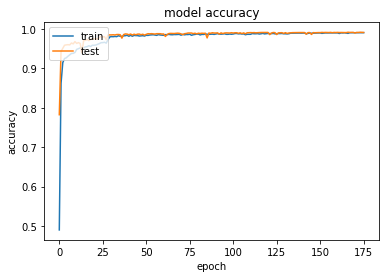

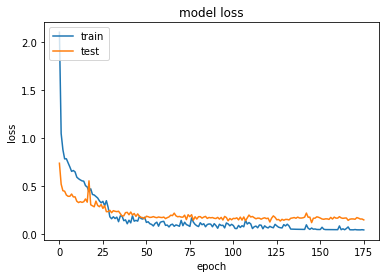

In [17]:
# # summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
model.reset_states()
model.load_weights('../../saved_models/unet/unet_v4/model.hdf5')
model.save('../../saved_models/unet/unet_v4/model_saved.h5')